In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import recall_score,precision_score,classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [33]:
data=pd.read_csv("oral_cancer_prediction_dataset.csv")
data.head(5)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [34]:
data=data.drop("ID",axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   84922 non-null  object 
 1   Age                                       84922 non-null  int64  
 2   Gender                                    84922 non-null  object 
 3   Tobacco Use                               84922 non-null  object 
 4   Alcohol Consumption                       84922 non-null  object 
 5   HPV Infection                             84922 non-null  object 
 6   Betel Quid Use                            84922 non-null  object 
 7   Chronic Sun Exposure                      84922 non-null  object 
 8   Poor Oral Hygiene                         84922 non-null  object 
 9   Diet (Fruits & Vegetables Intake)         84922 non-null  object 
 10  Family History of Cancer          

In [36]:
data.describe()

,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [37]:
data.isnull().sum()

Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per

In [38]:
data.duplicated().sum()

1390

In [39]:
data=data.drop_duplicates()

In [40]:
data.head(1)

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,0.0,0,No Treatment,100.0,0.0,0,No,No


In [41]:
cat_col = data.select_dtypes(include="object").columns  
le = LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col]) 

<Axes: >

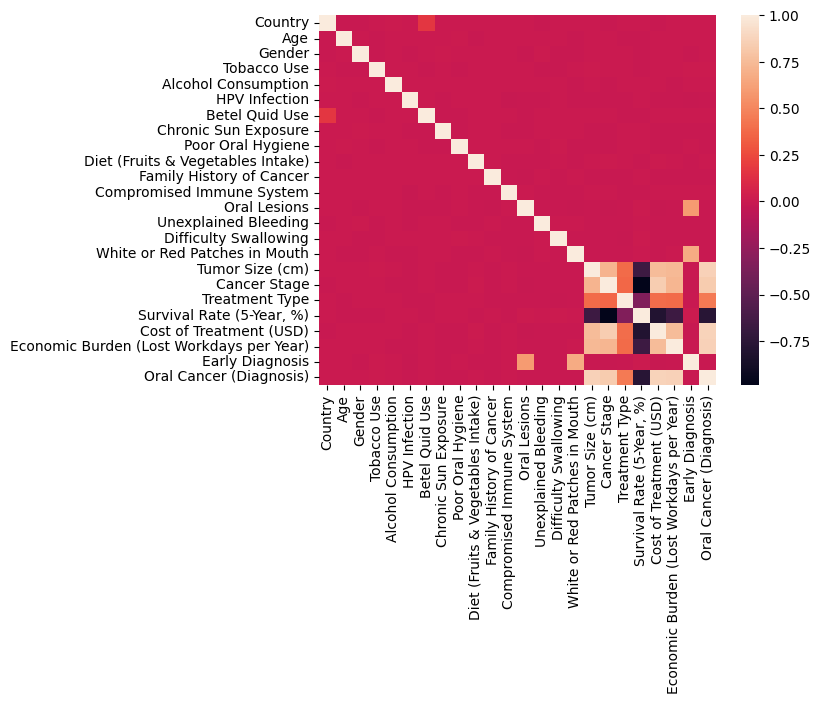

In [42]:
sns.heatmap(data.corr())

In [44]:
ss=StandardScaler()
x=data.drop(["Oral Cancer (Diagnosis)"],axis=1)
y=data["Oral Cancer (Diagnosis)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [45]:
clf={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [46]:
hyperparameters = {
    "Random Forest Classifier": {
        "n_estimators": 100,
        "max_depth": None,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "max_features": 'sqrt',
        "criterion": 'gini',
        "bootstrap": True,
        "oob_score": False,
        "random_state": 42
    },
    "Decision Tree Classifier": {
        "criterion": 'gini',
        "max_depth": None,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "max_features": None,
        "splitter": 'best',
        "random_state": 42,
        "class_weight": None
    },
    "Ada Boost Classifier": {
        "n_estimators": 50,
        "learning_rate": 1.0,
        "algorithm": 'SAMME.R',
        "random_state": 42
    },
    "Logistic Regression": {
        "penalty": 'l2',
        "C": 1.0,
        "solver": 'lbfgs',
        "max_iter": 100,
        "fit_intercept": True,
        "class_weight": None,
        "random_state": 42,
        "multi_class": 'auto',
        "warm_start": False
    }
}

Random Forest Classifier
Accuracy:1.0
Classification report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8322
           1       1.00      1.00      1.00      8385

    accuracy                           1.00     16707
   macro avg       1.00      1.00      1.00     16707
weighted avg       1.00      1.00      1.00     16707



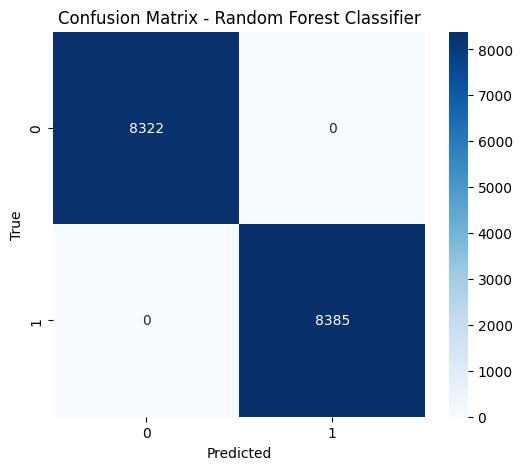

Decision Tree Classifier
Accuracy:1.0
Classification report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8322
           1       1.00      1.00      1.00      8385

    accuracy                           1.00     16707
   macro avg       1.00      1.00      1.00     16707
weighted avg       1.00      1.00      1.00     16707



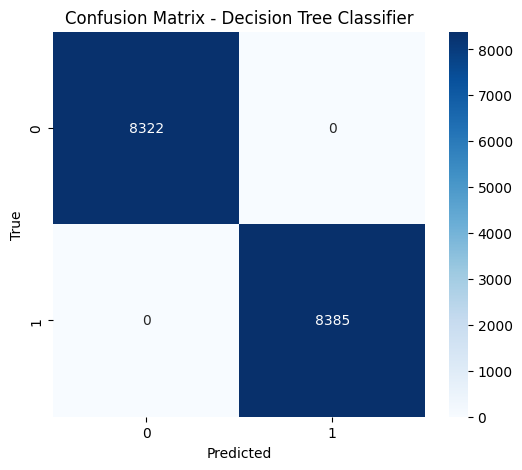

Ada Boost Classifier
Accuracy:1.0
Classification report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8322
           1       1.00      1.00      1.00      8385

    accuracy                           1.00     16707
   macro avg       1.00      1.00      1.00     16707
weighted avg       1.00      1.00      1.00     16707



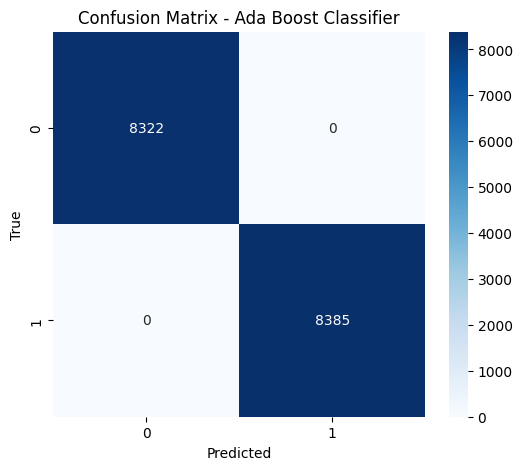

Logistic Regression
Accuracy:1.0
Classification report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8322
           1       1.00      1.00      1.00      8385

    accuracy                           1.00     16707
   macro avg       1.00      1.00      1.00     16707
weighted avg       1.00      1.00      1.00     16707



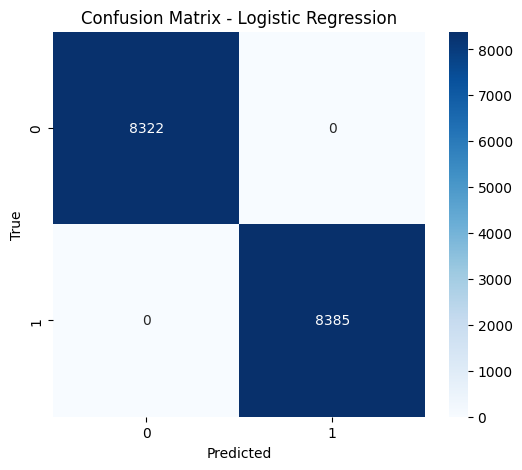

In [47]:
for name,model in clf.items():
    print(f"{name}")
    model.set_params(**hyperparameters[name])
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy:{accuracy}")
    print(f"Classification report{classification_report(y_test,y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()